# Librerias a utilizas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Descripcion del data set

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

- **Fecha-I** : Fecha y hora programada del vuelo.
- **Vlo-I** : Número de vuelo programado.
- **Ori-I** : Código de ciudad de origen programado.
- **Des-I** : Código de ciudad de destino programado.
- **Emp-I** : Código aerolínea de vuelo programado.
- **Fecha-O** : Fecha y hora de operación del vuelo.
- **Vlo-O** : Número de vuelo de operación del vuelo.
- **Ori-O** : Código de ciudad de origen de operación
- **Des-O** : Código de ciudad de destino de operación.
- **Emp-O** : Código aerolínea de vuelo operado.
- **DIA** : Día del mes de operación del vuelo.
- **MES** : Número de mes de operación del vuelo.
- **AÑO** : Año de operación del vuelo.
- **DIANOM** : Día de la semana de operación del vuelo.
- **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
- **OPERA** : Nombre de aerolínea que opera.
- **SIGLAORI** : Nombre ciudad origen.
- **SIGLADES** : Nombre ciudad destino.

**Desafio**

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo **synthetic_features.csv** :
  - **temporada_alta** : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
  - **dif_min** : diferencia en minutos entre Fecha-O y Fecha-I .
  - **atraso_15** : 1 si dif_min > 15, 0 si no.
  - **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I 
  

3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?




# Exploramos el dataset

- ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [2]:
df = pd.read_csv('dataset_SCL.csv')
df.head()

/home/juliom86/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [4]:
df.shape

(68206, 18)

In [5]:
df.dtypes.value_counts()

object    15
int64      3
dtype: int64

In [6]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Vlo-O        0.000015
Fecha-I      0.000000
DIA          0.000000
SIGLAORI     0.000000
OPERA        0.000000
TIPOVUELO    0.000000
DIANOM       0.000000
AÑO          0.000000
MES          0.000000
Emp-O        0.000000
Vlo-I        0.000000
Des-O        0.000000
Ori-O        0.000000
Fecha-O      0.000000
Emp-I        0.000000
Des-I        0.000000
Ori-I        0.000000
SIGLADES     0.000000
dtype: float64

- La respuesta  la primer pregunta es que tenemos un total de 15 variables objetos, entre ellas categoricas que tendriamos que trabajarlas a cada una.
- La fecha se tiene que trabajar en formato datetime, tendremos que ver la diferencia entre dia nominal y dia
- Tenemos muy pocas variables nulas, asi que las podemos eliminar tranquilamente

In [7]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format = '%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [9]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I'])/ np.timedelta64(1, 'h') * 60

In [10]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0


In [11]:
# temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
#ya sacamos las diferencias de minutos, falraria ver los negativos#dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
#atraso_15 : 1 si dif_min > 15, 0 si no.
#periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I

In [12]:
# funcion para retraso
def retraso(x):
    if x > 15:
        return 1
    return 0

In [13]:
df['atraso_15'] = df['dif_min'].apply(retraso)

In [14]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0,0


In [15]:
# temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

def temporada(x):
    x = pd.to_datetime(x, format = '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
    if (x>='2017-12-15') or (x <= '2017-03-03'):
        return 1
    if (x>='2017-07-15') and (x <= '2017-07-31'):
        return 1
    if (x>='2017-09-11') and (x <= '2017-09-30'):
        return 1
    else:
        return 0
    

In [16]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada)

In [17]:
 
#df['Fecha-I']= pd.to_datetime(df['Fecha-I'], format = '%d-%m').dt.strftime('%d-%m')

In [18]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,atraso_15,temporada_alta
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,46.0,1,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,16.0,1,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,40.0,1,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,13.0,0,1
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,...,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,9.0,0,1


In [19]:
#periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I
def periodos(x):
    x = pd.to_datetime(x, format = '%H:%M').strftime('%H:%M')
    if (x>='05:00') and (x <= '11:59'):
        return 'mañana'
    if (x>='12:00') and (x <= '18:59'):
        return 'tarde'  
    else:
        return 'noche' 


In [20]:
df['periodo_dia'] = df['Fecha-I'].apply(periodos)

In [21]:
df #cambiar tipo de vuelo a variable numerica

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,atraso_15,temporada_alta,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,3.0,0,1,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,9.0,0,1,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,9.0,0,1,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0,0,1,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0,0,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,46.0,1,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,16.0,1,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,40.0,1,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,13.0,0,1,tarde


In [22]:
df.to_csv('synthetic_features.csv', index = False)

## ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?


In [23]:
df.atraso_15.value_counts(normalize = True)

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

In [24]:
aerolineas = []
for i in df['OPERA'].unique():
    aerolineas.append(i)
    
aerolineas

['American Airlines',
 'Air Canada',
 'Air France',
 'Aeromexico',
 'Aerolineas Argentinas',
 'Austral',
 'Avianca',
 'Alitalia',
 'British Airways',
 'Copa Air',
 'Delta Air',
 'Gol Trans',
 'Iberia',
 'K.L.M.',
 'Qantas Airways',
 'United Airlines',
 'Grupo LATAM',
 'Sky Airline',
 'Latin American Wings',
 'Plus Ultra Lineas Aereas',
 'JetSmart SPA',
 'Oceanair Linhas Aereas',
 'Lacsa']

(757, 22)
0    0.932629
1    0.067371
Name: atraso_15, dtype: float64


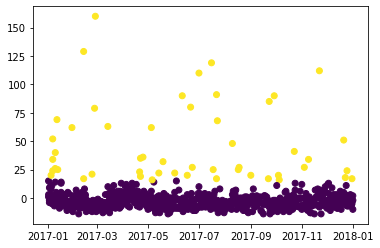

In [25]:
aer = df[df['OPERA'] =='American Airlines']

#am_air = aer.groupby('OPERA')['dif_min'].mean()
#am_air

plt.scatter(aer['Fecha-I'], aer.dif_min, c = aer.atraso_15)
print(aer.shape)
print(aer.atraso_15.value_counts(normalize = True))

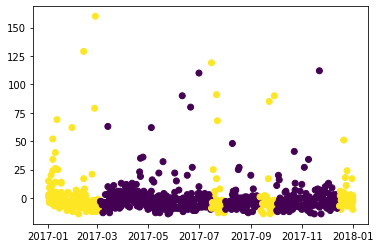

In [26]:
plt.scatter(aer['Fecha-I'], aer.dif_min, c = aer.temporada_alta)

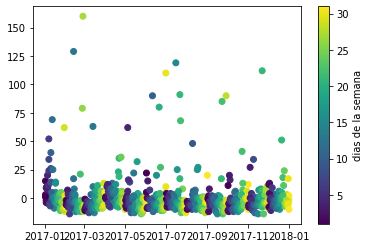

In [27]:
plt.scatter(aer['Fecha-I'], aer.dif_min, c = aer.DIA)
plt.colorbar(label = "dias de la semana")

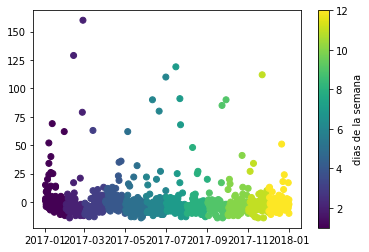

In [28]:
plt.scatter(aer['Fecha-I'], aer.dif_min, c = aer.MES)
plt.colorbar(label = "dias de la semana")

In [29]:
lugares = []
for i in df['SIGLADES'].unique():
    lugares.append(i)
    
lugares

['Miami',
 'Dallas',
 'Buenos Aires',
 'Toronto',
 'Paris',
 'Ciudad de Mexico',
 'Bogota',
 'Roma',
 'Londres',
 'Ciudad de Panama',
 'Atlanta',
 'Sao Paulo',
 'Rio de Janeiro',
 'Florianapolis',
 'Madrid',
 'Lima',
 'Sydney',
 'Houston',
 'Asuncion',
 'Cataratas Iguacu',
 'Puerto Montt',
 'Punta Arenas',
 'Puerto Natales',
 'Balmaceda',
 'Temuco',
 'Valdivia',
 'Concepcion',
 'La Serena',
 'Copiapo',
 'Calama',
 'Antofagasta',
 'Iquique',
 'Arica',
 'Mendoza',
 'Cordoba',
 'Montevideo',
 'Castro (Chiloe)',
 'Osorno',
 'Orlando',
 'Nueva York',
 'Guayaquil',
 'Cancun',
 'Punta Cana',
 'Los Angeles',
 'Auckland N.Z.',
 'Isla de Pascua',
 'La Paz',
 'Santa Cruz',
 'Curitiba, Bra.',
 'Quito',
 'Bariloche',
 'Rosario',
 'Washington',
 'Tucuman',
 'Melbourne',
 'San Juan, Arg.',
 'Neuquen',
 'Pisco, Peru',
 'Ushuia',
 'Puerto Stanley',
 'Punta del Este',
 'Cochabamba']

In [30]:
mia = df[df['SIGLADES'] =='Miami']
print(mia.shape)
print(mia.atraso_15.value_counts(normalize = True))

(1016, 22)
0    0.809055
1    0.190945
Name: atraso_15, dtype: float64


In [31]:
print(len(aerolineas))
print(len(lugares))


23
62


In [32]:
for i in aerolineas:
    aero = df[df['OPERA'] == i]
    print(i)
    print(aero.shape)
    print(aero.atraso_15.value_counts(normalize = True))

American Airlines
(757, 22)
0    0.932629
1    0.067371
Name: atraso_15, dtype: float64
Air Canada
(565, 22)
0    0.543363
1    0.456637
Name: atraso_15, dtype: float64
Air France
(358, 22)
0    0.916201
1    0.083799
Name: atraso_15, dtype: float64
Aeromexico
(351, 22)
0    0.97151
1    0.02849
Name: atraso_15, dtype: float64
Aerolineas Argentinas
(1949, 22)
0    0.759877
1    0.240123
Name: atraso_15, dtype: float64
Austral
(74, 22)
0    0.797297
1    0.202703
Name: atraso_15, dtype: float64
Avianca
(1152, 22)
0    0.734375
1    0.265625
Name: atraso_15, dtype: float64
Alitalia
(259, 22)
0    0.888031
1    0.111969
Name: atraso_15, dtype: float64
British Airways
(205, 22)
0    0.858537
1    0.141463
Name: atraso_15, dtype: float64
Copa Air
(1850, 22)
0    0.937297
1    0.062703
Name: atraso_15, dtype: float64
Delta Air
(358, 22)
0    0.941341
1    0.058659
Name: atraso_15, dtype: float64
Gol Trans
(806, 22)
0    0.643921
1    0.356079
Name: atraso_15, dtype: float64
Iberia
(362, 22)


**AERLOINEAS A DESCARTAR**

Porque tuvieron mas del 90% de los vuelos sin atrasos

- American Airlines
- Air France
- Aeromexico
- Copa AIr
- Delta Air
- Iberia
- K.L.M.
- United Airlines


In [33]:
for i in lugares:
    lug = df[df['SIGLADES'] == i]
    print(i)
    print(lug.shape)
    print(lug.atraso_15.value_counts(normalize = True))

Miami
(1016, 22)
0    0.809055
1    0.190945
Name: atraso_15, dtype: float64
Dallas
(357, 22)
0    0.929972
1    0.070028
Name: atraso_15, dtype: float64
Buenos Aires
(6335, 22)
0    0.744278
1    0.255722
Name: atraso_15, dtype: float64
Toronto
(283, 22)
0    0.685512
1    0.314488
Name: atraso_15, dtype: float64
Paris
(359, 22)
0    0.913649
1    0.086351
Name: atraso_15, dtype: float64
Ciudad de Mexico
(700, 22)
0    0.905714
1    0.094286
Name: atraso_15, dtype: float64
Bogota
(1604, 22)
0    0.741272
1    0.258728
Name: atraso_15, dtype: float64
Roma
(259, 22)
0    0.888031
1    0.111969
Name: atraso_15, dtype: float64
Londres
(205, 22)
0    0.858537
1    0.141463
Name: atraso_15, dtype: float64
Ciudad de Panama
(1850, 22)
0    0.937297
1    0.062703
Name: atraso_15, dtype: float64
Atlanta
(358, 22)
0    0.941341
1    0.058659
Name: atraso_15, dtype: float64
Sao Paulo
(3569, 22)
0    0.753152
1    0.246848
Name: atraso_15, dtype: float64
Rio de Janeiro
(1435, 22)
0    0.71777
1   

**CIUDADES A DESCARTAR**

Por que tuvieron mas de un 90% de vuelso sin atrasos, tambien se descarto que tuvieran 1 o dos vuelos

- Dallas
- Paris
- Ciudad de Mexico
- Ciudad de Panama
- Atlanta
- Houston
- Cataratas Iguacu
- Puerto Natales
- Castro (Chiloe)
- Curitiba, Bra.
- Quito
- Bariloche (por tener solamente dos vuelos y da un 50%)
- Washington
- Pisco, Peru
- Puerto Stanley
- Cochabamba
- 

In [34]:
meses = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
for i in meses:
    mes = df[df['MES'] == i]
    print(i)
    print(mes.shape)
    print(mes.atraso_15.value_counts(normalize = True))

1
(6108, 22)
0    0.839882
1    0.160118
Name: atraso_15, dtype: float64
2
(5561, 22)
0    0.848409
1    0.151591
Name: atraso_15, dtype: float64
3
(5482, 22)
0    0.884896
1    0.115104
Name: atraso_15, dtype: float64
4
(5020, 22)
0    0.883466
1    0.116534
Name: atraso_15, dtype: float64
5
(5240, 22)
0    0.842176
1    0.157824
Name: atraso_15, dtype: float64
6
(4981, 22)
0    0.82895
1    0.17105
Name: atraso_15, dtype: float64
7
(5992, 22)
0    0.706609
1    0.293391
Name: atraso_15, dtype: float64
8
(5744, 22)
0    0.826602
1    0.173398
Name: atraso_15, dtype: float64
9
(5610, 22)
0    0.827629
1    0.172371
Name: atraso_15, dtype: float64
10
(6032, 22)
0    0.774038
1    0.225962
Name: atraso_15, dtype: float64
11
(6080, 22)
0    0.802796
1    0.197204
Name: atraso_15, dtype: float64
12
(6356, 22)
0    0.745909
1    0.254091
Name: atraso_15, dtype: float64


No descartamos ningun mes debido a que  hubo retrasos considerables, los unicos meses cercanos al 90% son los meses de **Abril y Marzo**

In [35]:
dias = [ 1,  2,  3,  4,  5,  7,  8, 10, 12, 14, 16, 18, 21, 23, 25, 28, 30,
        6,  9, 11, 13, 15, 17, 19, 22, 24, 26, 27, 29, 31, 20]
for i in dias:
    dia = df[df['DIA'] == i]
    print(i)
    print(dia.shape)
    print(dia.atraso_15.value_counts(normalize = True))

1
(2208, 22)
0    0.851449
1    0.148551
Name: atraso_15, dtype: float64
2
(2223, 22)
0    0.841655
1    0.158345
Name: atraso_15, dtype: float64
3
(2271, 22)
0    0.823866
1    0.176134
Name: atraso_15, dtype: float64
4
(2215, 22)
0    0.810384
1    0.189616
Name: atraso_15, dtype: float64
5
(2241, 22)
0    0.825524
1    0.174476
Name: atraso_15, dtype: float64
7
(2264, 22)
0    0.841873
1    0.158127
Name: atraso_15, dtype: float64
8
(2213, 22)
0    0.837777
1    0.162223
Name: atraso_15, dtype: float64
10
(2283, 22)
0    0.77442
1    0.22558
Name: atraso_15, dtype: float64
12
(2284, 22)
0    0.809107
1    0.190893
Name: atraso_15, dtype: float64
14
(2221, 22)
0    0.797839
1    0.202161
Name: atraso_15, dtype: float64
16
(2268, 22)
0    0.793651
1    0.206349
Name: atraso_15, dtype: float64
18
(2160, 22)
0    0.809259
1    0.190741
Name: atraso_15, dtype: float64
21
(2267, 22)
0    0.808558
1    0.191442
Name: atraso_15, dtype: float64
23
(2260, 22)
0    0.820354
1    0.179646
Name:

No se descartara ningun dia

In [36]:
temporradas = [1, 0]

for i in temporradas:
    temp = df[df['temporada_alta'] == i]
    print(i)
    print(temp.shape)
    print(temp.atraso_15.value_counts(normalize = True))

1
(22762, 22)
0    0.80362
1    0.19638
Name: atraso_15, dtype: float64
0
(45444, 22)
0    0.82079
1    0.17921
Name: atraso_15, dtype: float64


In [37]:
df['periodo_dia'].unique()

array(['noche', 'tarde', 'mañana'], dtype=object)

In [38]:
franjas_horarias = ['noche', 'tarde', 'mañana']
for i in franjas_horarias:
    per = df[df['periodo_dia'] == i]
    print(i)
    print(per.shape)
    print(per.atraso_15.value_counts(normalize = True))

noche
(17348, 22)
0    0.799977
1    0.200023
Name: atraso_15, dtype: float64
tarde
(25506, 22)
0    0.800596
1    0.199404
Name: atraso_15, dtype: float64
mañana
(25352, 22)
0    0.839934
1    0.160066
Name: atraso_15, dtype: float64


No descartamos ninguna franja horaria, practicamente entre la mañana y la tarde tenemps la misma distribucion de vuelos, pero tenemos un 3% de atrasos. A la noche se tiene menos vuelos pero el atraso es casi similar con la tarde. Seria un parametro a estudiar la franja nocturna

In [40]:
#df['TIPOVUELO'].unique()
clase = ['I', 'N']
for i in clase:
    tipovue = df[df['TIPOVUELO'] == i]
    print(i)
    print(tipovue.shape)
    print(tipovue.atraso_15.value_counts(normalize = True))


I
(31240, 22)
0    0.774392
1    0.225608
Name: atraso_15, dtype: float64
N
(36966, 22)
0    0.849429
1    0.150571
Name: atraso_15, dtype: float64


La los tipos de vuelos I poseen mas atrasos con los respecto a los N y a su ves poseen menos vuelos

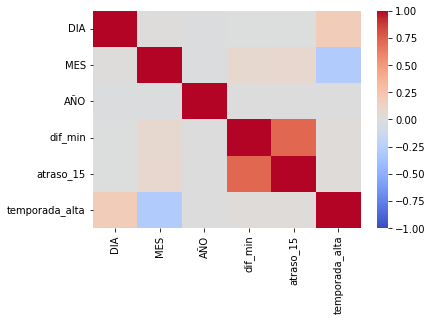

In [41]:
sns.heatmap(df.corr(), cmap='coolwarm',vmin=-1, vmax=1);

### Consideraciones con respecto al analisis de los datos influyentes

- Se analizara toda variable qeu tenga por debajo de 90% de no atrasos
- se analizo que algunos destinos y algunas aerolineas, practicamente no poseen retrasos. Por ende en los siguientes analisis se las descartara para calculos los retrasos. 
- los meses o dias de la semana se los tomara a todos en cuenta, 
- lo que es el tipo de clase hay mas atrasos en los internacionales. 
- En las frnajas horarias hay mas retraso en las tardes y noche
- Se tomara en cuenta las temporadas, si bien son casi parecidas, hay el doble de vuelos en temporada baja que alta y hay una diferencia de 2% de retraso